In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [115]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [116]:
original_data = pd.read_csv("pokemon.csv")

In [117]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [118]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [119]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [120]:
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)

In [121]:
print(legendary.shape)
legendary.head()

(65, 13)


#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       95      125     85           1       True  
1      125       90    100           1       True  
2      125       85     90           1       True  
3      154       90    130           1       True  
4      154      100    130           1       True

In [122]:
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [123]:
pokemon["#"].nunique()

721

In [124]:
pokemon[pokemon["#"] == 6]

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
6      109       85    100           1      False  
7      130       85    100           1      False  
8      159      115    100           1      False

In [125]:
pokemon.loc[[6, 10]]

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
6   6  Charizard   Fire  Flying    534  78      84       78      109       85   
10  8  Wartortle  Water     NaN    405  59      63       80       65       80   

    Speed  Generation  Legendary  
6     100           1      False  
10     58           1      False

In [126]:
print(pokemon["Type 1"].nunique())
print(pokemon["Type 2"].nunique()) # nunique는 결측치를 하나의 종류로 세지않음

18
18


In [127]:
# 차집합
a, b = set(pokemon["Type 2"]), set(pokemon["Type 1"])
a.difference(b)

{nan}

둘의 차이점은 nan뿐

In [128]:
pokemon["Type 2"].isnull().sum()

386

In [129]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Steel', 'Water', 'Fairy', 'Fighting', 'Electric', 'Ground', 'Poison', 'Rock', 'Bug', 'Fire', 'Psychic', 'Ice', 'Flying', 'Ghost', 'Grass', 'Normal', 'Dragon', 'Dark']


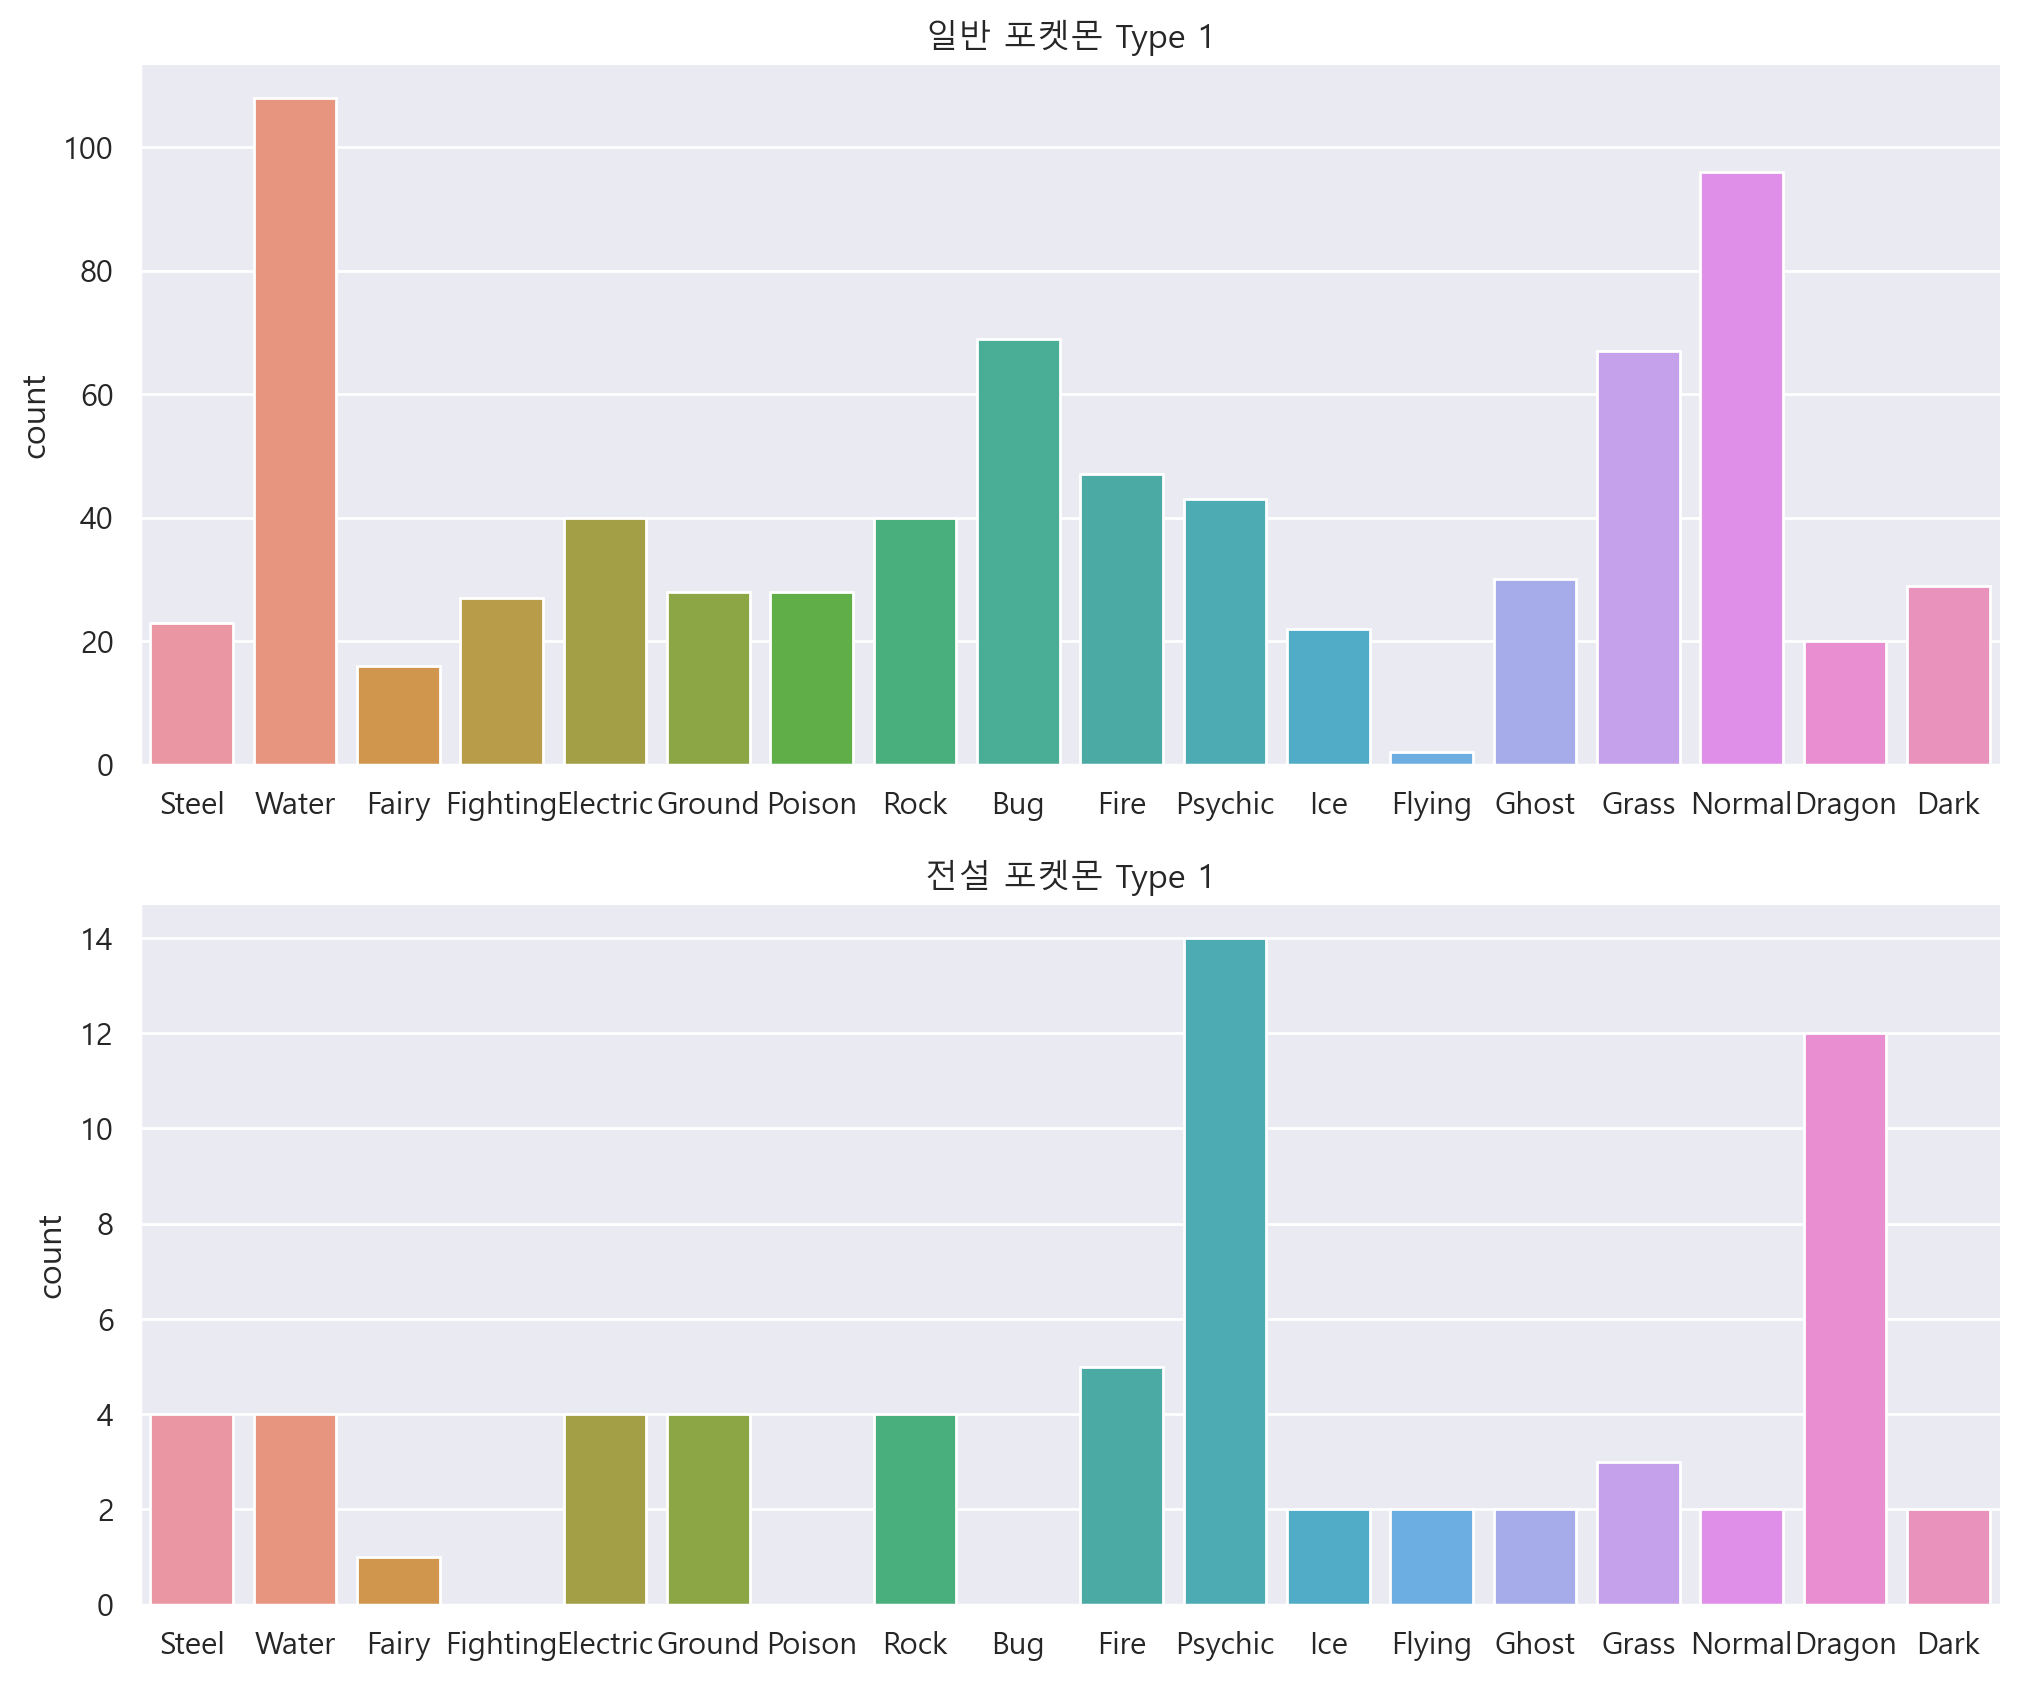

In [130]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("일반 포켓몬 Type 1")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("전설 포켓몬 Type 1")

plt.show()

In [131]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

Legendary
Type 1             
Flying     0.500000
Dragon     0.375000
Psychic    0.245614
Steel      0.148148
Ground     0.125000
Fire       0.096154
Electric   0.090909
Rock       0.090909
Ice        0.083333
Dark       0.064516
Ghost      0.062500
Fairy      0.058824
Grass      0.042857
Water      0.035714
Normal     0.020408
Poison     0.000000
Fighting   0.000000
Bug        0.000000

In [132]:
pd.pivot_table(pokemon, index="Type 1", values="Attack").sort_values(by=["Attack"], ascending=False)

Attack
Type 1              
Dragon    112.125000
Fighting   96.777778
Ground     95.750000
Rock       92.863636
Steel      92.703704
Dark       88.387097
Fire       84.769231
Flying     78.750000
Poison     74.678571
Water      74.151786
Ghost      73.781250
Normal     73.469388
Grass      73.214286
Ice        72.750000
Psychic    71.456140
Bug        70.971014
Electric   69.090909
Fairy      61.529412

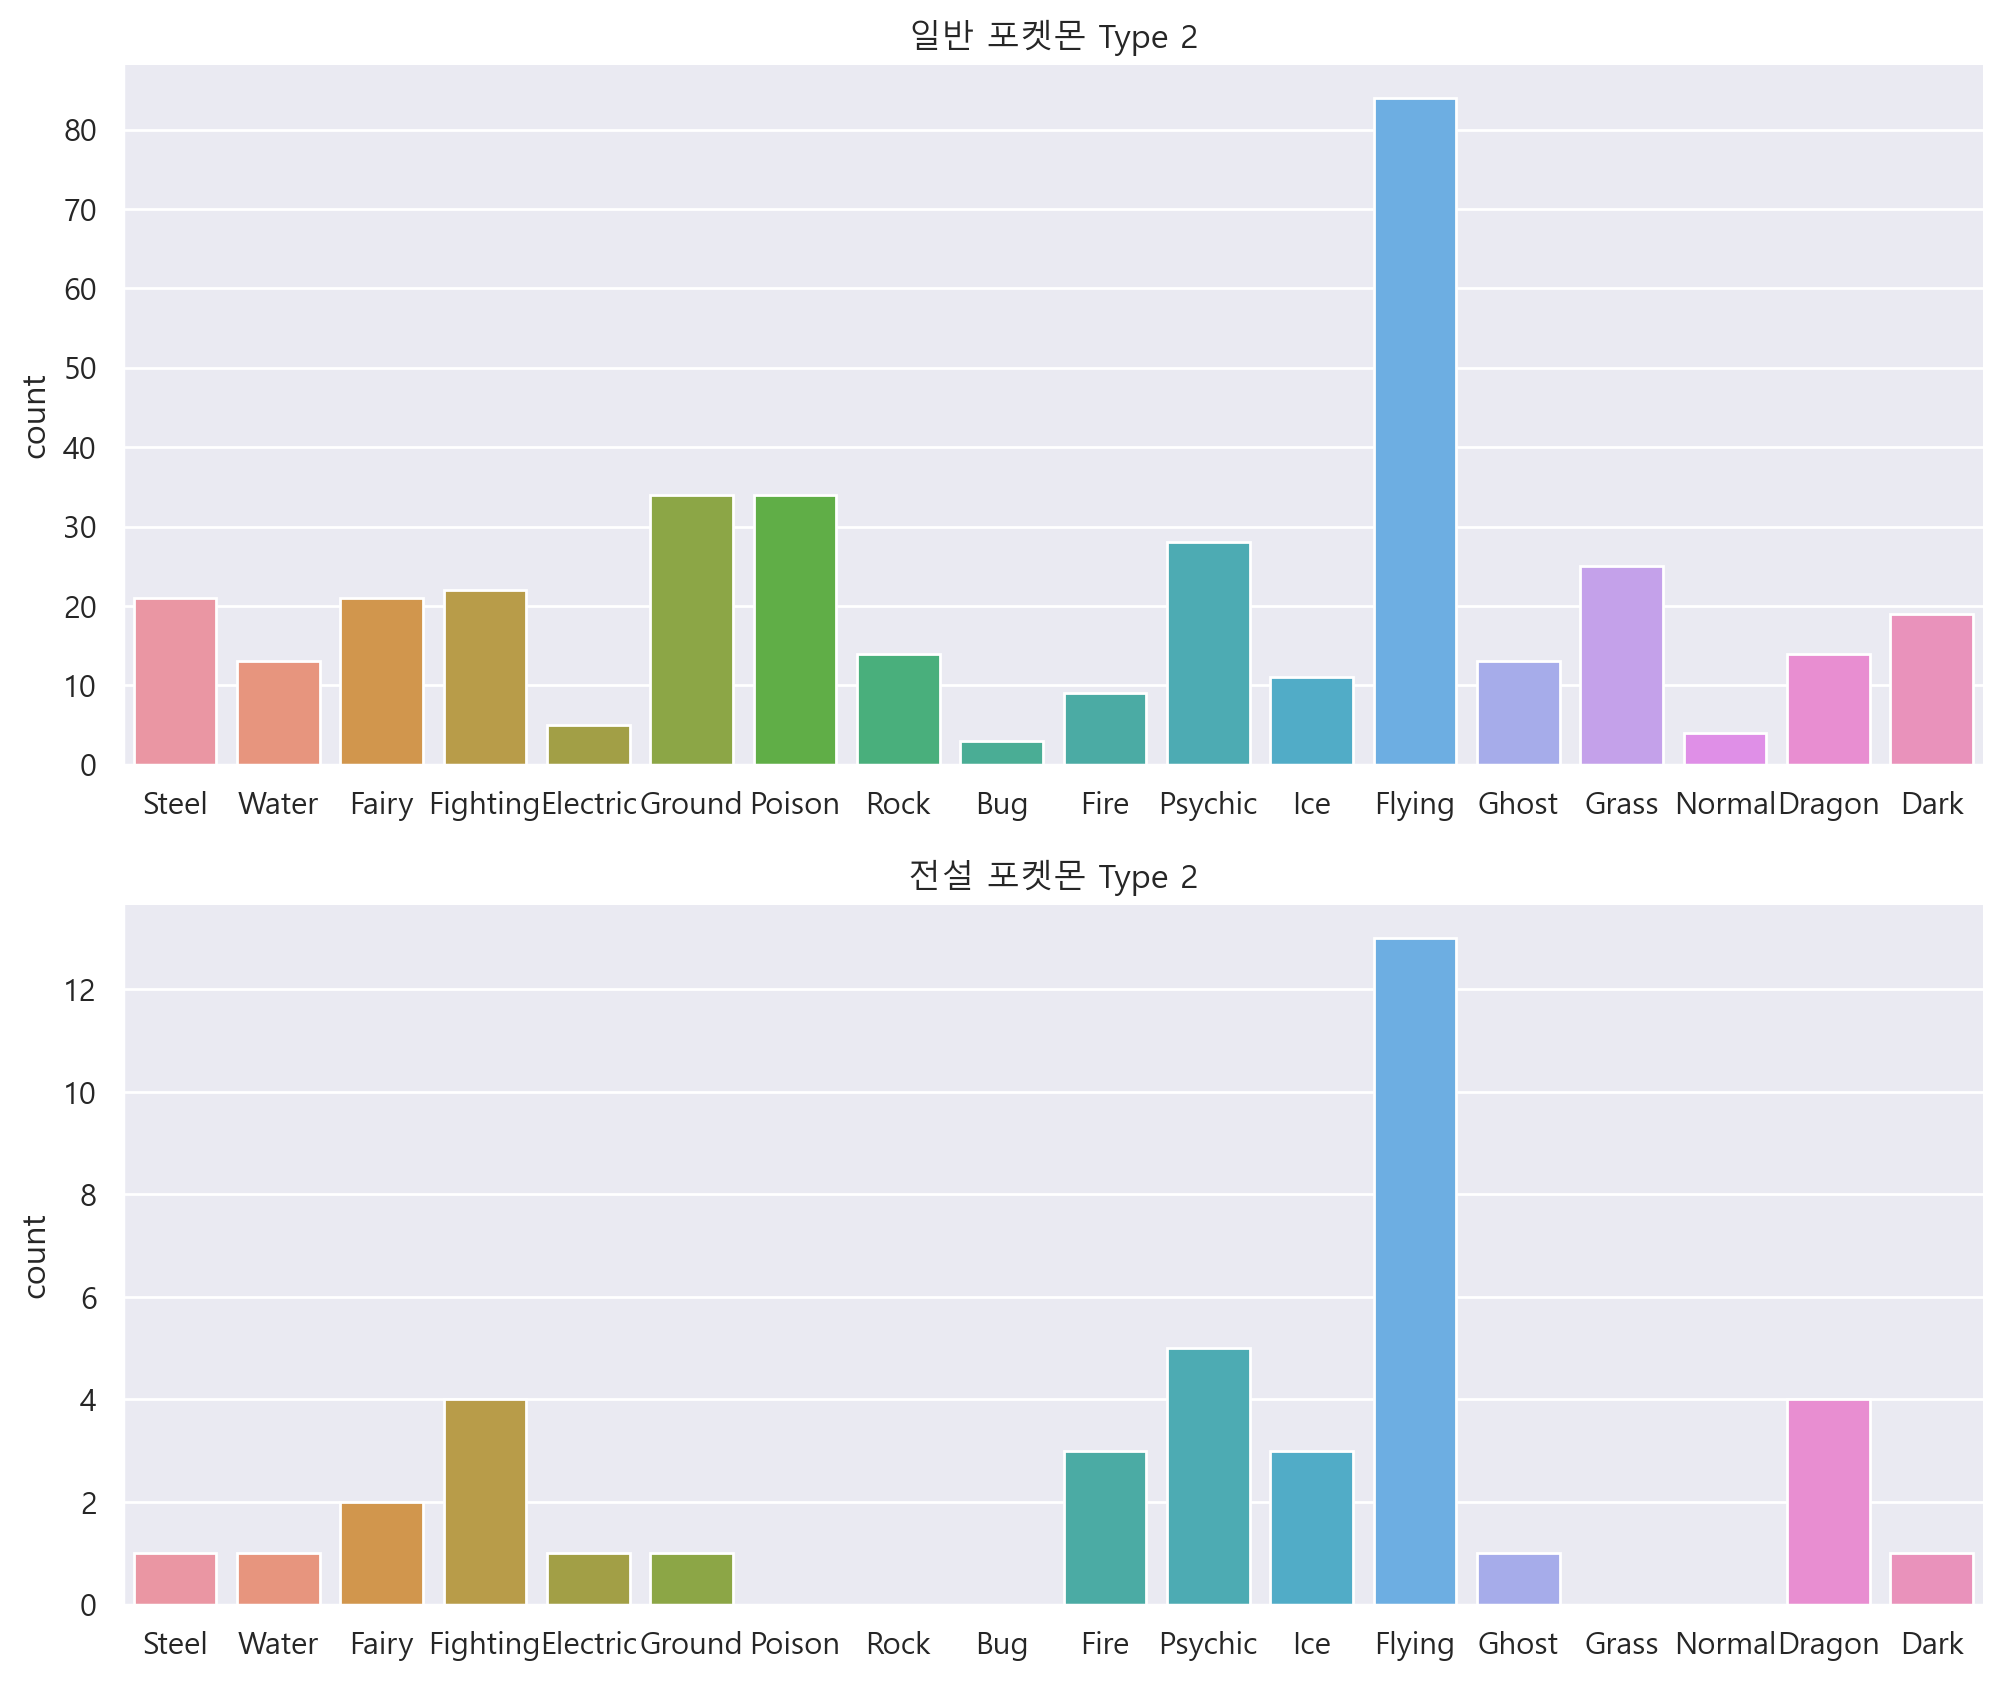

In [133]:
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("일반 포켓몬 Type 2")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("전설 포켓몬 Type 2")

plt.show()

In [134]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

In [135]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [136]:
print(pokemon["Total"].values.sum())
print(pokemon[stats].values.sum())

348082
348082


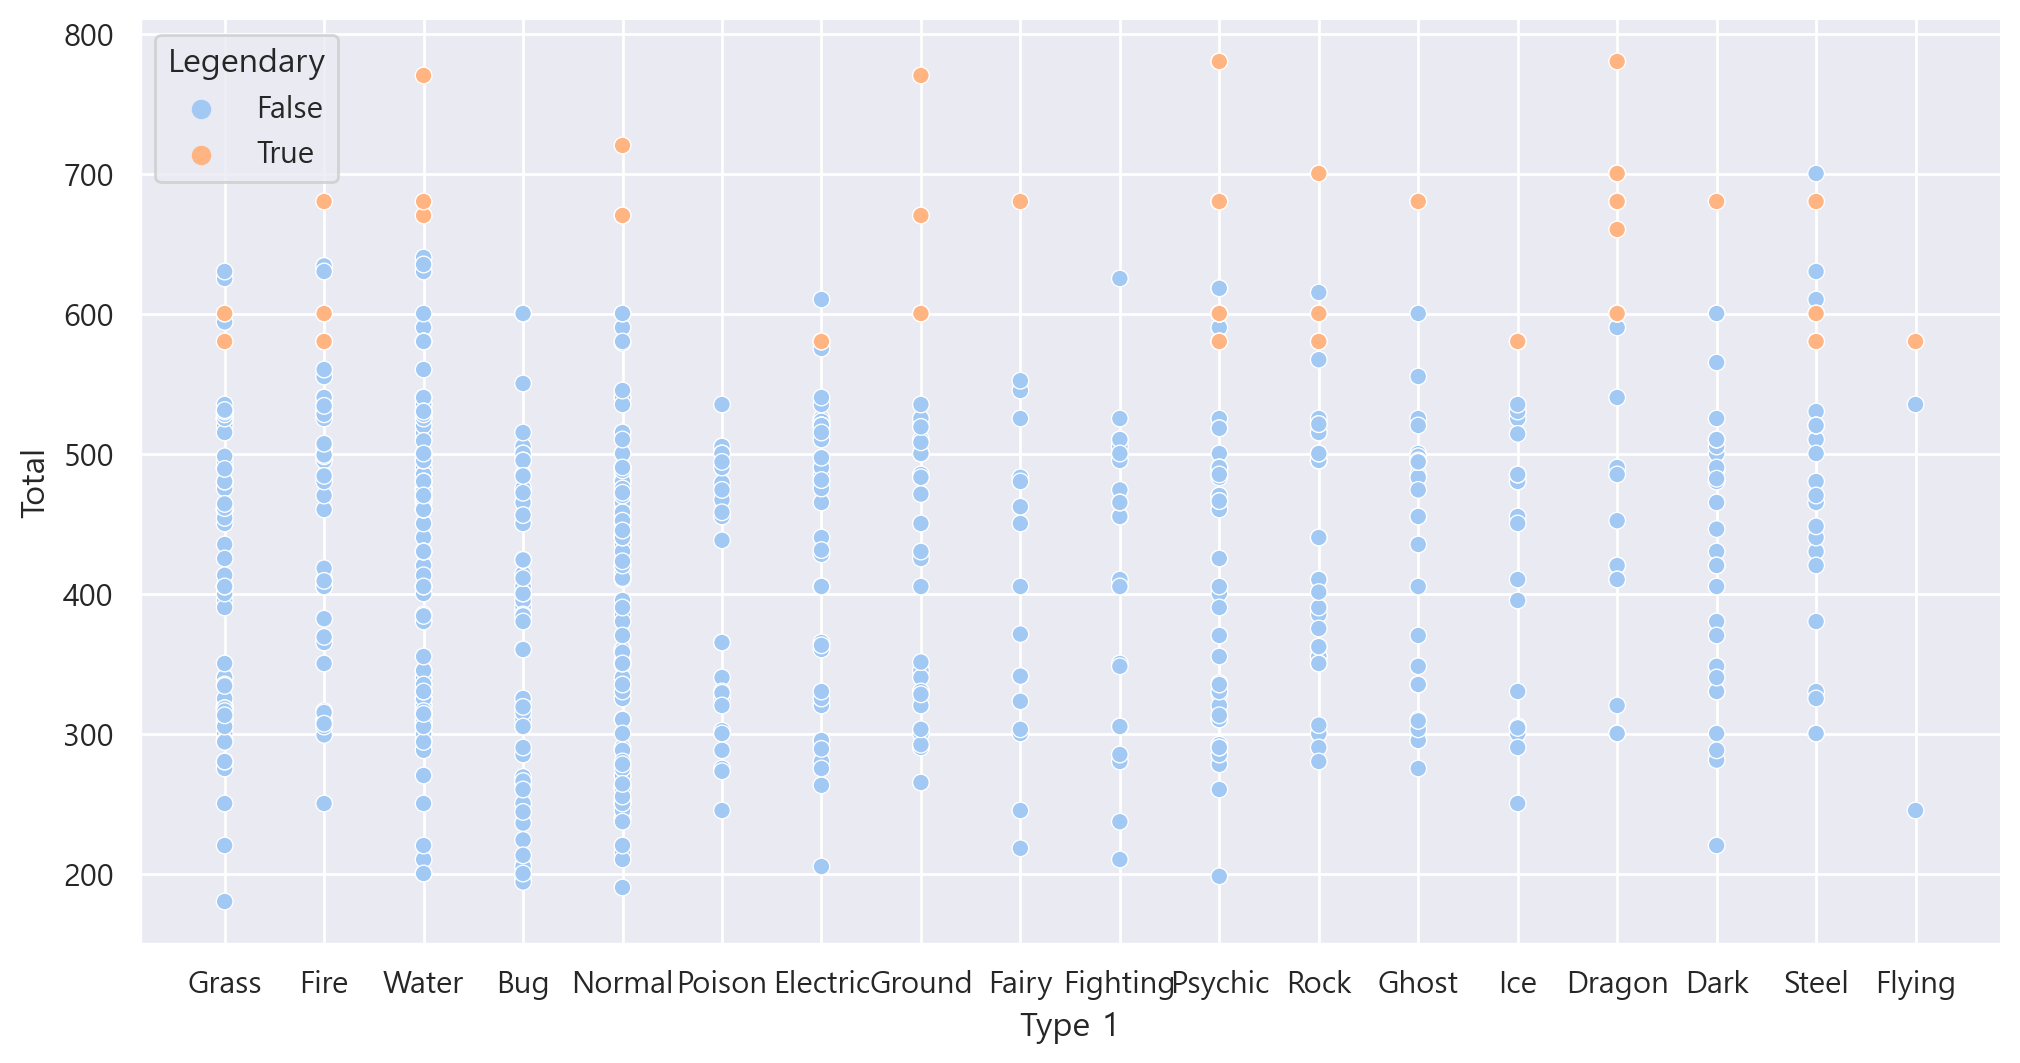

In [137]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

C:\Users\김영준\PycharmProjects\aiffel_study\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


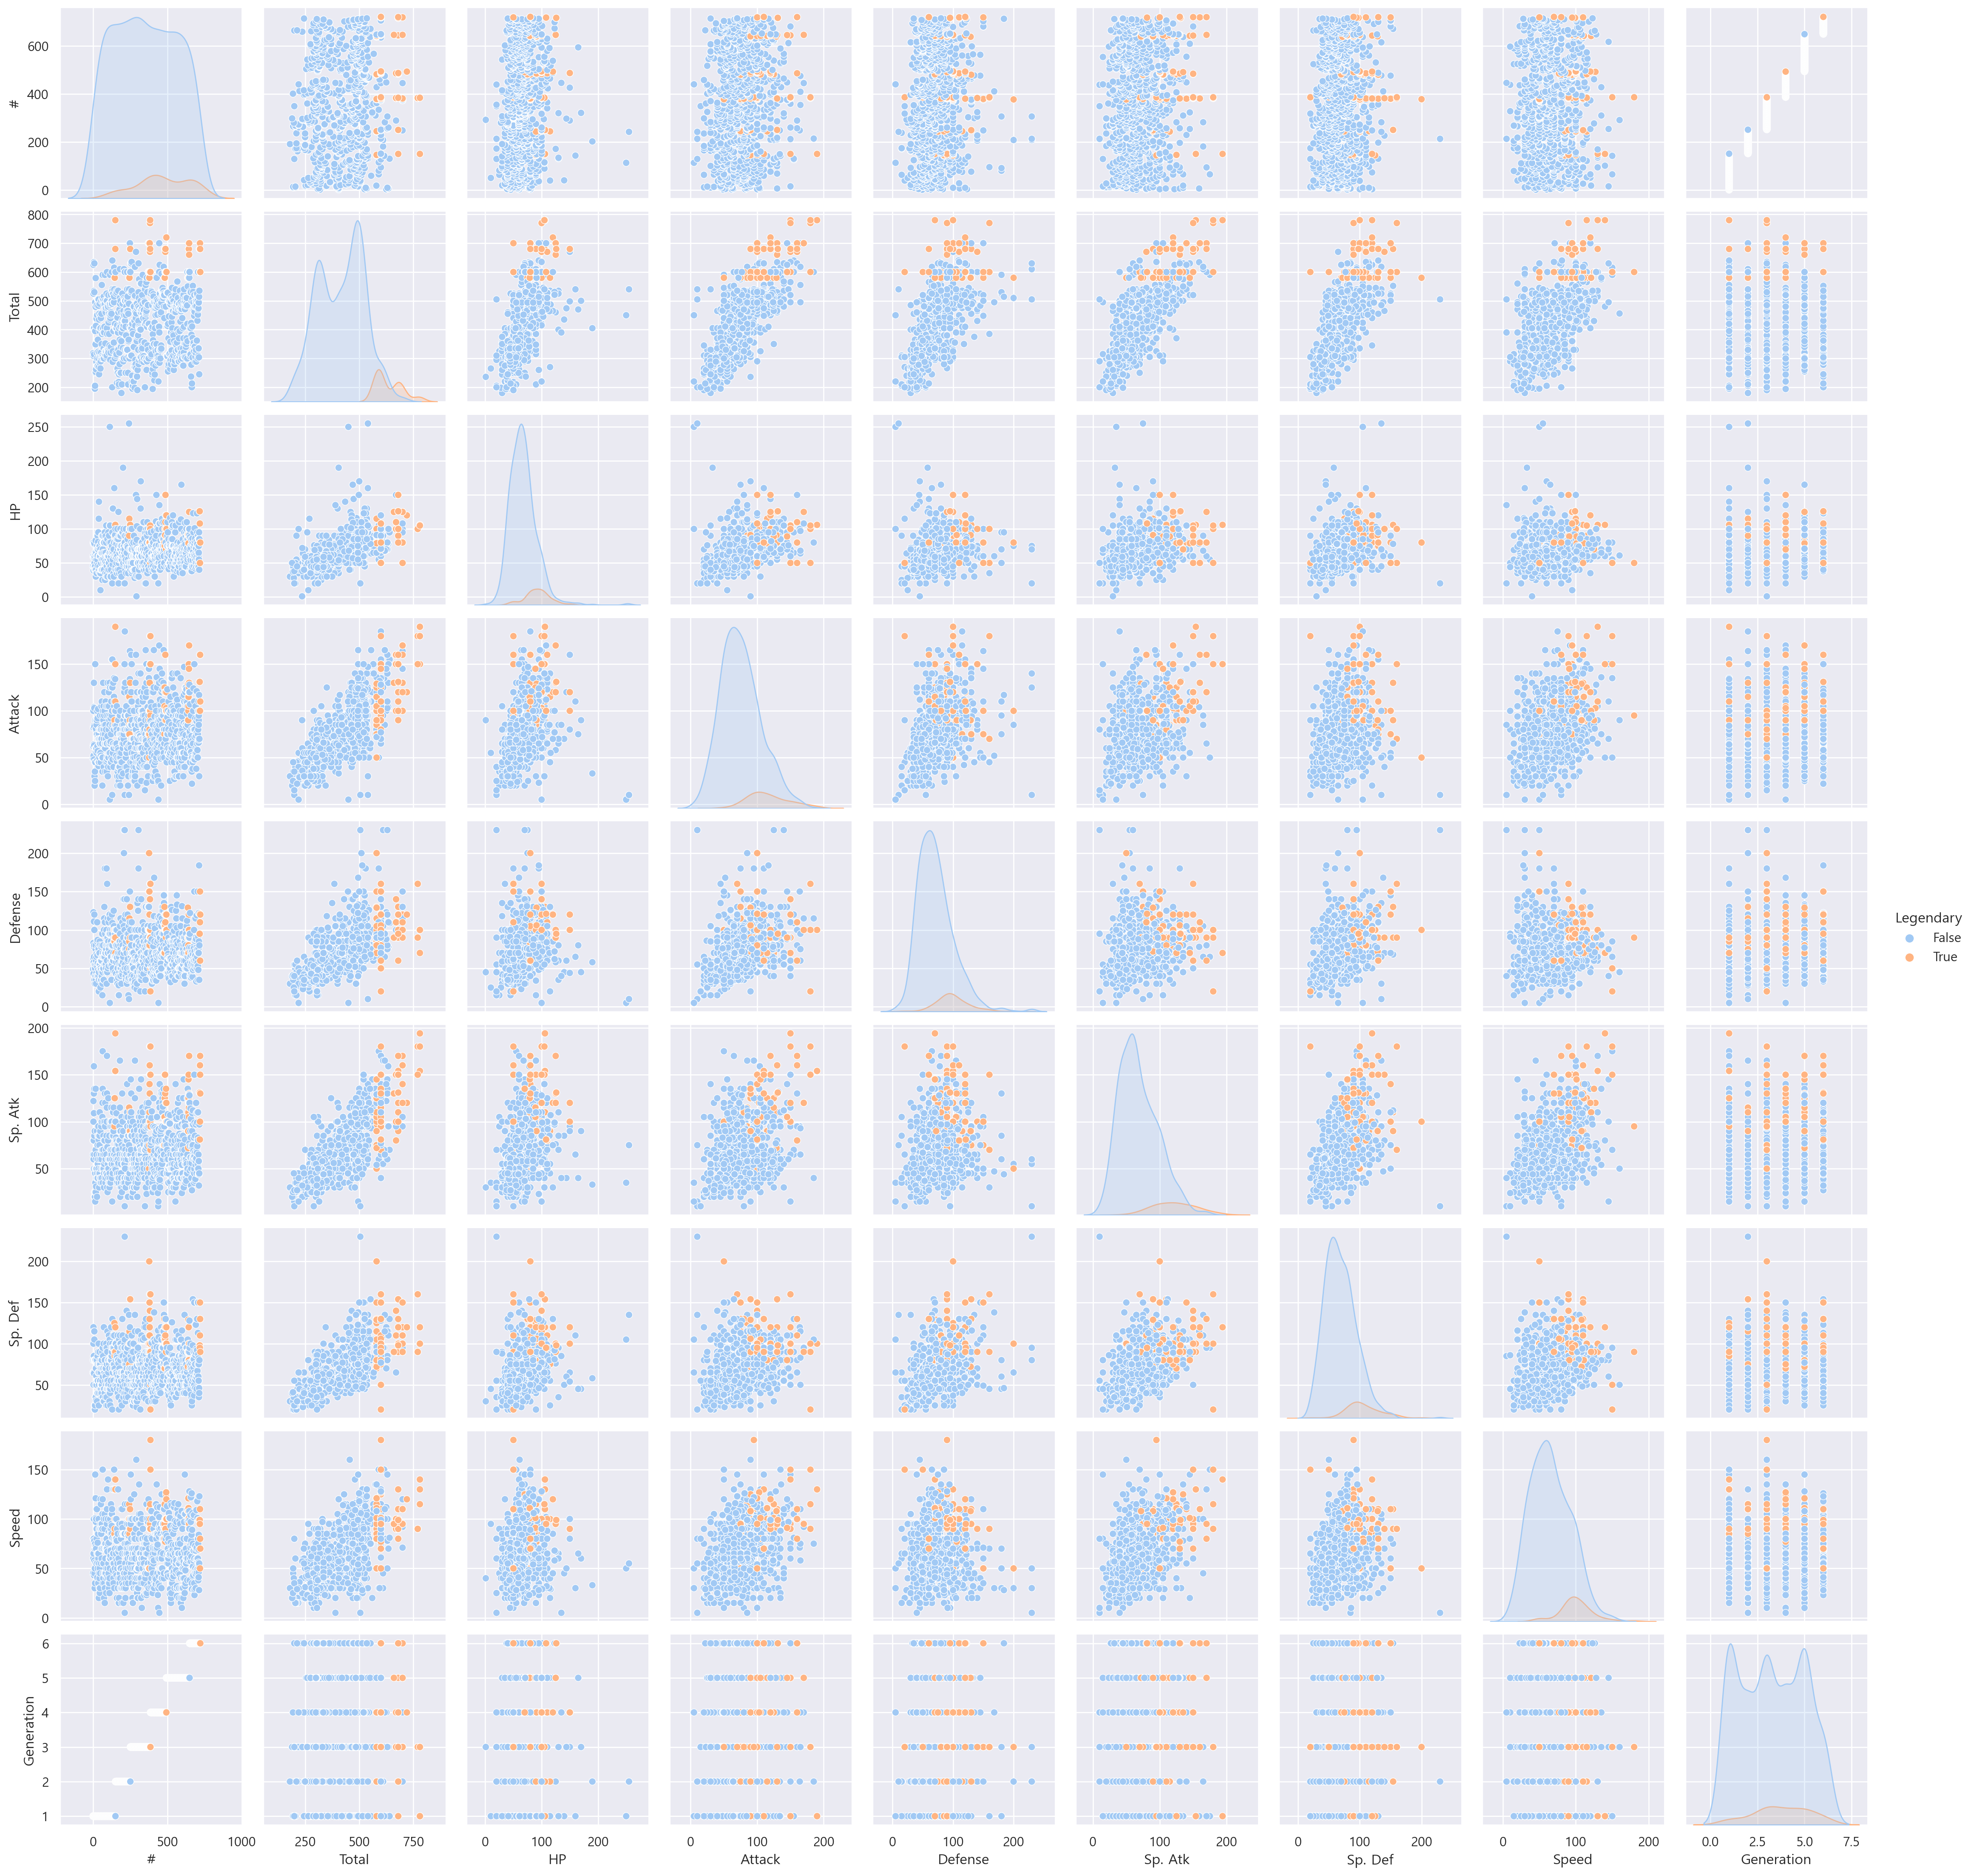

In [138]:
sns.pairplot(pokemon, hue="Legendary")
plt.show()

C:\Users\김영준\AppData\Local\Temp\ipykernel_19176\1563207744.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


<Figure size 600x400 with 0 Axes>

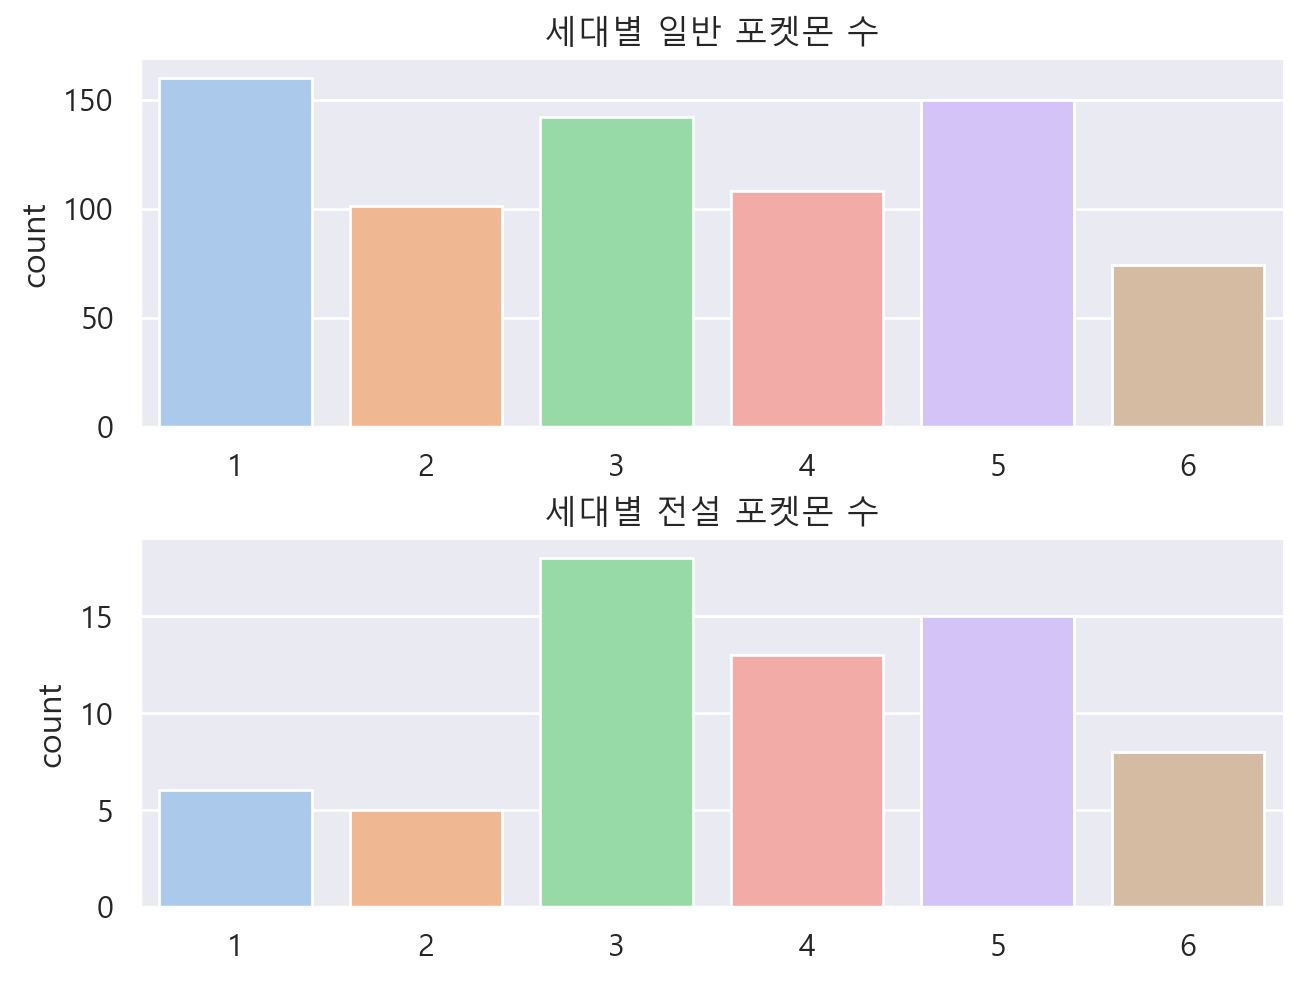

In [139]:
plt.figure(figsize=(6, 4))
plt.subplots(constrained_layout=True) # 서브플롯간의 간격을 알아서 조정
plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("세대별 일반 포켓몬 수")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("세대별 전설 포켓몬 수")
plt.show()

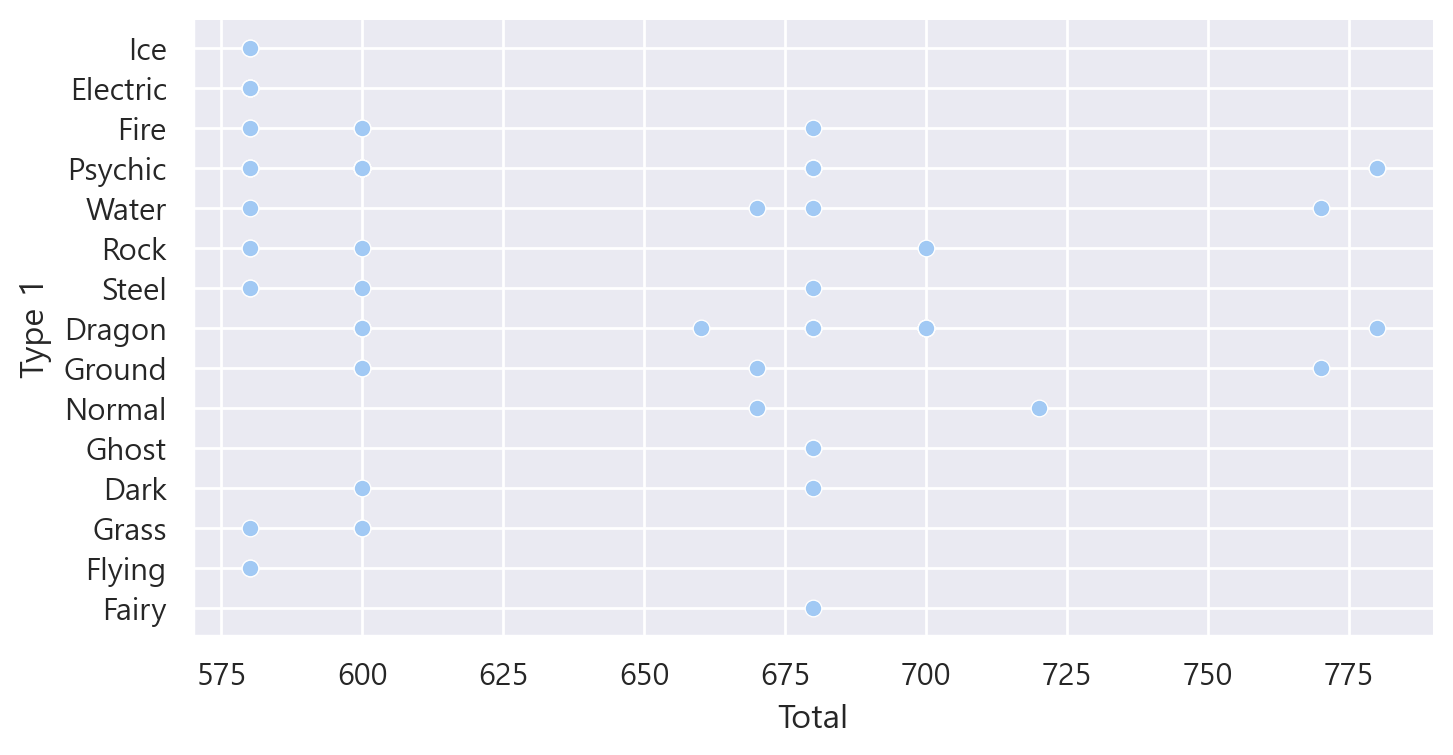

In [140]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

산점도가 너무 이쁘게 그려져있음 Total 값의 종류를 확인해봐야함

In [141]:
# sorted(list(set(legendary["Total"]))))
sorted(legendary["Total"].unique().tolist())

[580, 600, 660, 670, 680, 700, 720, 770, 780]

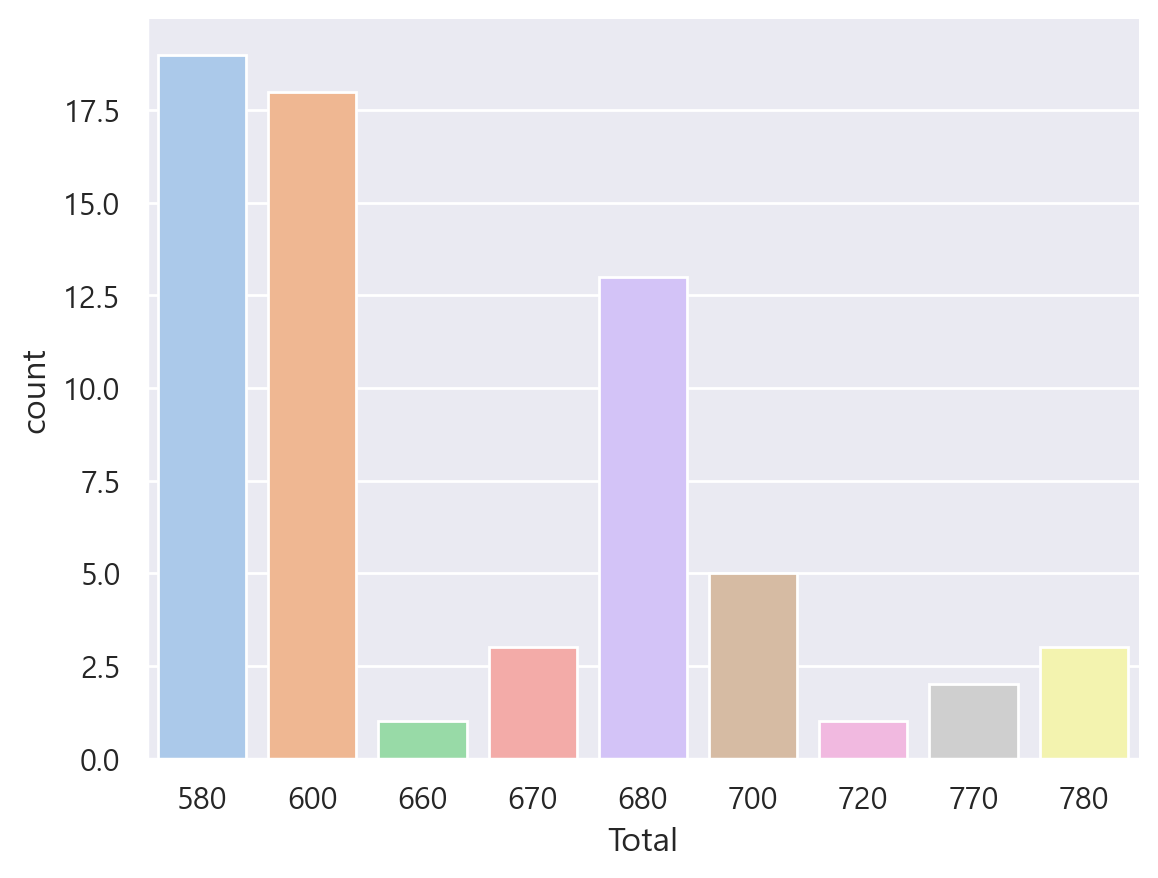

In [142]:
sns.countplot(data=legendary, x="Total")
plt.show()

In [143]:
round(65 / 9, 2) # 65 / 9를 소숫점 2자리까지만 표현

7.22

In [144]:
print(ordinary["Total"].nunique())
print(legendary["Total"].nunique())

195
9


In [145]:
print(round(len(legendary) / 9, 2)) # 65 / 9를 소숫점 2자리까지만 표현
print(round(len(ordinary)/ 195, 2))

7.22
3.77


In [146]:
set(legendary["Total"]).difference(set(ordinary["Total"]))

{660, 680, 720, 770, 780}

- 이 사실로 Total값이 전설포켓몬을 분류하는데 아주 큰 역할을 담당하는것을 알수 있음
- 660, 680, 720, 770, 780 의 Total값들은 일반 포켓몬에는 존재하지도 않음

### 이름으로 구분해보기

In [147]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

#                      Name    Type 1    Type 2  Total   HP  Attack  \
0   150                    Mewtwo   Psychic       NaN    680  106     110   
1   150       MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190   
2   150       MewtwoMega Mewtwo Y   Psychic       NaN    780  106     150   
3   380                    Latias    Dragon   Psychic    600   80      80   
4   380         LatiasMega Latias    Dragon   Psychic    700   80     100   
5   381                    Latios    Dragon   Psychic    600   80      90   
6   381         LatiosMega Latios    Dragon   Psychic    700   80     130   
7   382                    Kyogre     Water       NaN    670  100     100   
8   382       KyogrePrimal Kyogre     Water       NaN    770  100     150   
9   383                   Groudon    Ground       NaN    670  100     150   
10  383     GroudonPrimal Groudon    Ground      Fire    770  100     180   
11  384                  Rayquaza    Dragon    Flying    680  105     150   
12  384     RayquazaMega Rayquaza    Dragon    Flying    780  105     180   
13  386        DeoxysNormal Forme   Psychic       NaN    600   50     150   
14  386        DeoxysAttack Forme   Psychic       NaN    600   50     180   
15  386       DeoxysDefense Forme   Psychic       NaN    600   50      70   
16  386         DeoxysSpeed Forme   Psychic       NaN    600   50      95   
17  641   TornadusIncarnate Forme    Flying       NaN    580   79     115   
18  641     TornadusTherian Forme    Flying       NaN    580   79     100   
19  642  ThundurusIncarnate Forme  Electric    Flying    580   79     115   
20  642    ThundurusTherian Forme  Electric    Flying    580   79     105   
21  645   LandorusIncarnate Forme    Ground    Flying    600   89     125   
22  645     LandorusTherian Forme    Ground    Flying    600   89     145   
23  646                    Kyurem    Dragon       Ice    660  125     130   
24  646        KyuremBlack Kyurem    Dragon       Ice    700  125     170   
25  646        KyuremWhite Kyurem    Dragon       Ice    700  125     120   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        90      154       90    130           1       True  
1       100      154      100    130           1       True  
2        70      194      120    140           1       True  
3        90      110      130    110           3       True  
4       120      140      150    110           3       True  
5        80      130      110    110           3       True  
6       100      160      120    110           3       True  
7        90      150      140     90           3       True  
8        90      180      160     90           3       True  
9       140      100       90     90           3       True  
10      160      150       90     90           3       True  
11       90      150       90     95           3       True  
12      100      180      100    115           3       True  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17       70      125       80    111           5       True  
18       80      110       90    121           5       True  
19       70      125       80    111           5       True  
20       70      145       80    101           5       True  
21       90      115       80    101           5       True  
22       90      105       80     91           5       True  
23       90      130       90     95           5       True  
24      100      120       90     95           5       True  
25       90      170      100     95           5       True

In [148]:
formes = names[13:23]
formes

#                      Name    Type 1  Type 2  Total  HP  Attack  \
13  386        DeoxysNormal Forme   Psychic     NaN    600  50     150   
14  386        DeoxysAttack Forme   Psychic     NaN    600  50     180   
15  386       DeoxysDefense Forme   Psychic     NaN    600  50      70   
16  386         DeoxysSpeed Forme   Psychic     NaN    600  50      95   
17  641   TornadusIncarnate Forme    Flying     NaN    580  79     115   
18  641     TornadusTherian Forme    Flying     NaN    580  79     100   
19  642  ThundurusIncarnate Forme  Electric  Flying    580  79     115   
20  642    ThundurusTherian Forme  Electric  Flying    580  79     105   
21  645   LandorusIncarnate Forme    Ground  Flying    600  89     125   
22  645     LandorusTherian Forme    Ground  Flying    600  89     145   

    Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
13       50      150       50    150           3       True  
14       20      180       20    150           3       True  
15      160       70      160     90           3       True  
16       90       95       90    180           3       True  
17       70      125       80    111           5       True  
18       80      110       90    121           5       True  
19       70      125       80    111           5       True  
20       70      145       80    101           5       True  
21       90      115       80    101           5       True  
22       90      105       80     91           5       True

In [149]:
# 이름의 유사도와 더불어 이름의 길이까지
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

#                 Name    Type 1    Type 2  Total   HP  Attack  Defense  \
0  144             Articuno       Ice    Flying    580   90      85      100   
1  145               Zapdos  Electric    Flying    580   90      90       85   
2  146              Moltres      Fire    Flying    580   90     100       90   
3  150               Mewtwo   Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X   Psychic  Fighting    780  106     190      100   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       95      125     85           1       True           8  
1      125       90    100           1       True           6  
2      125       85     90           1       True           7  
3      154       90    130           1       True           6  
4      154      100    130           1       True          19

In [150]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

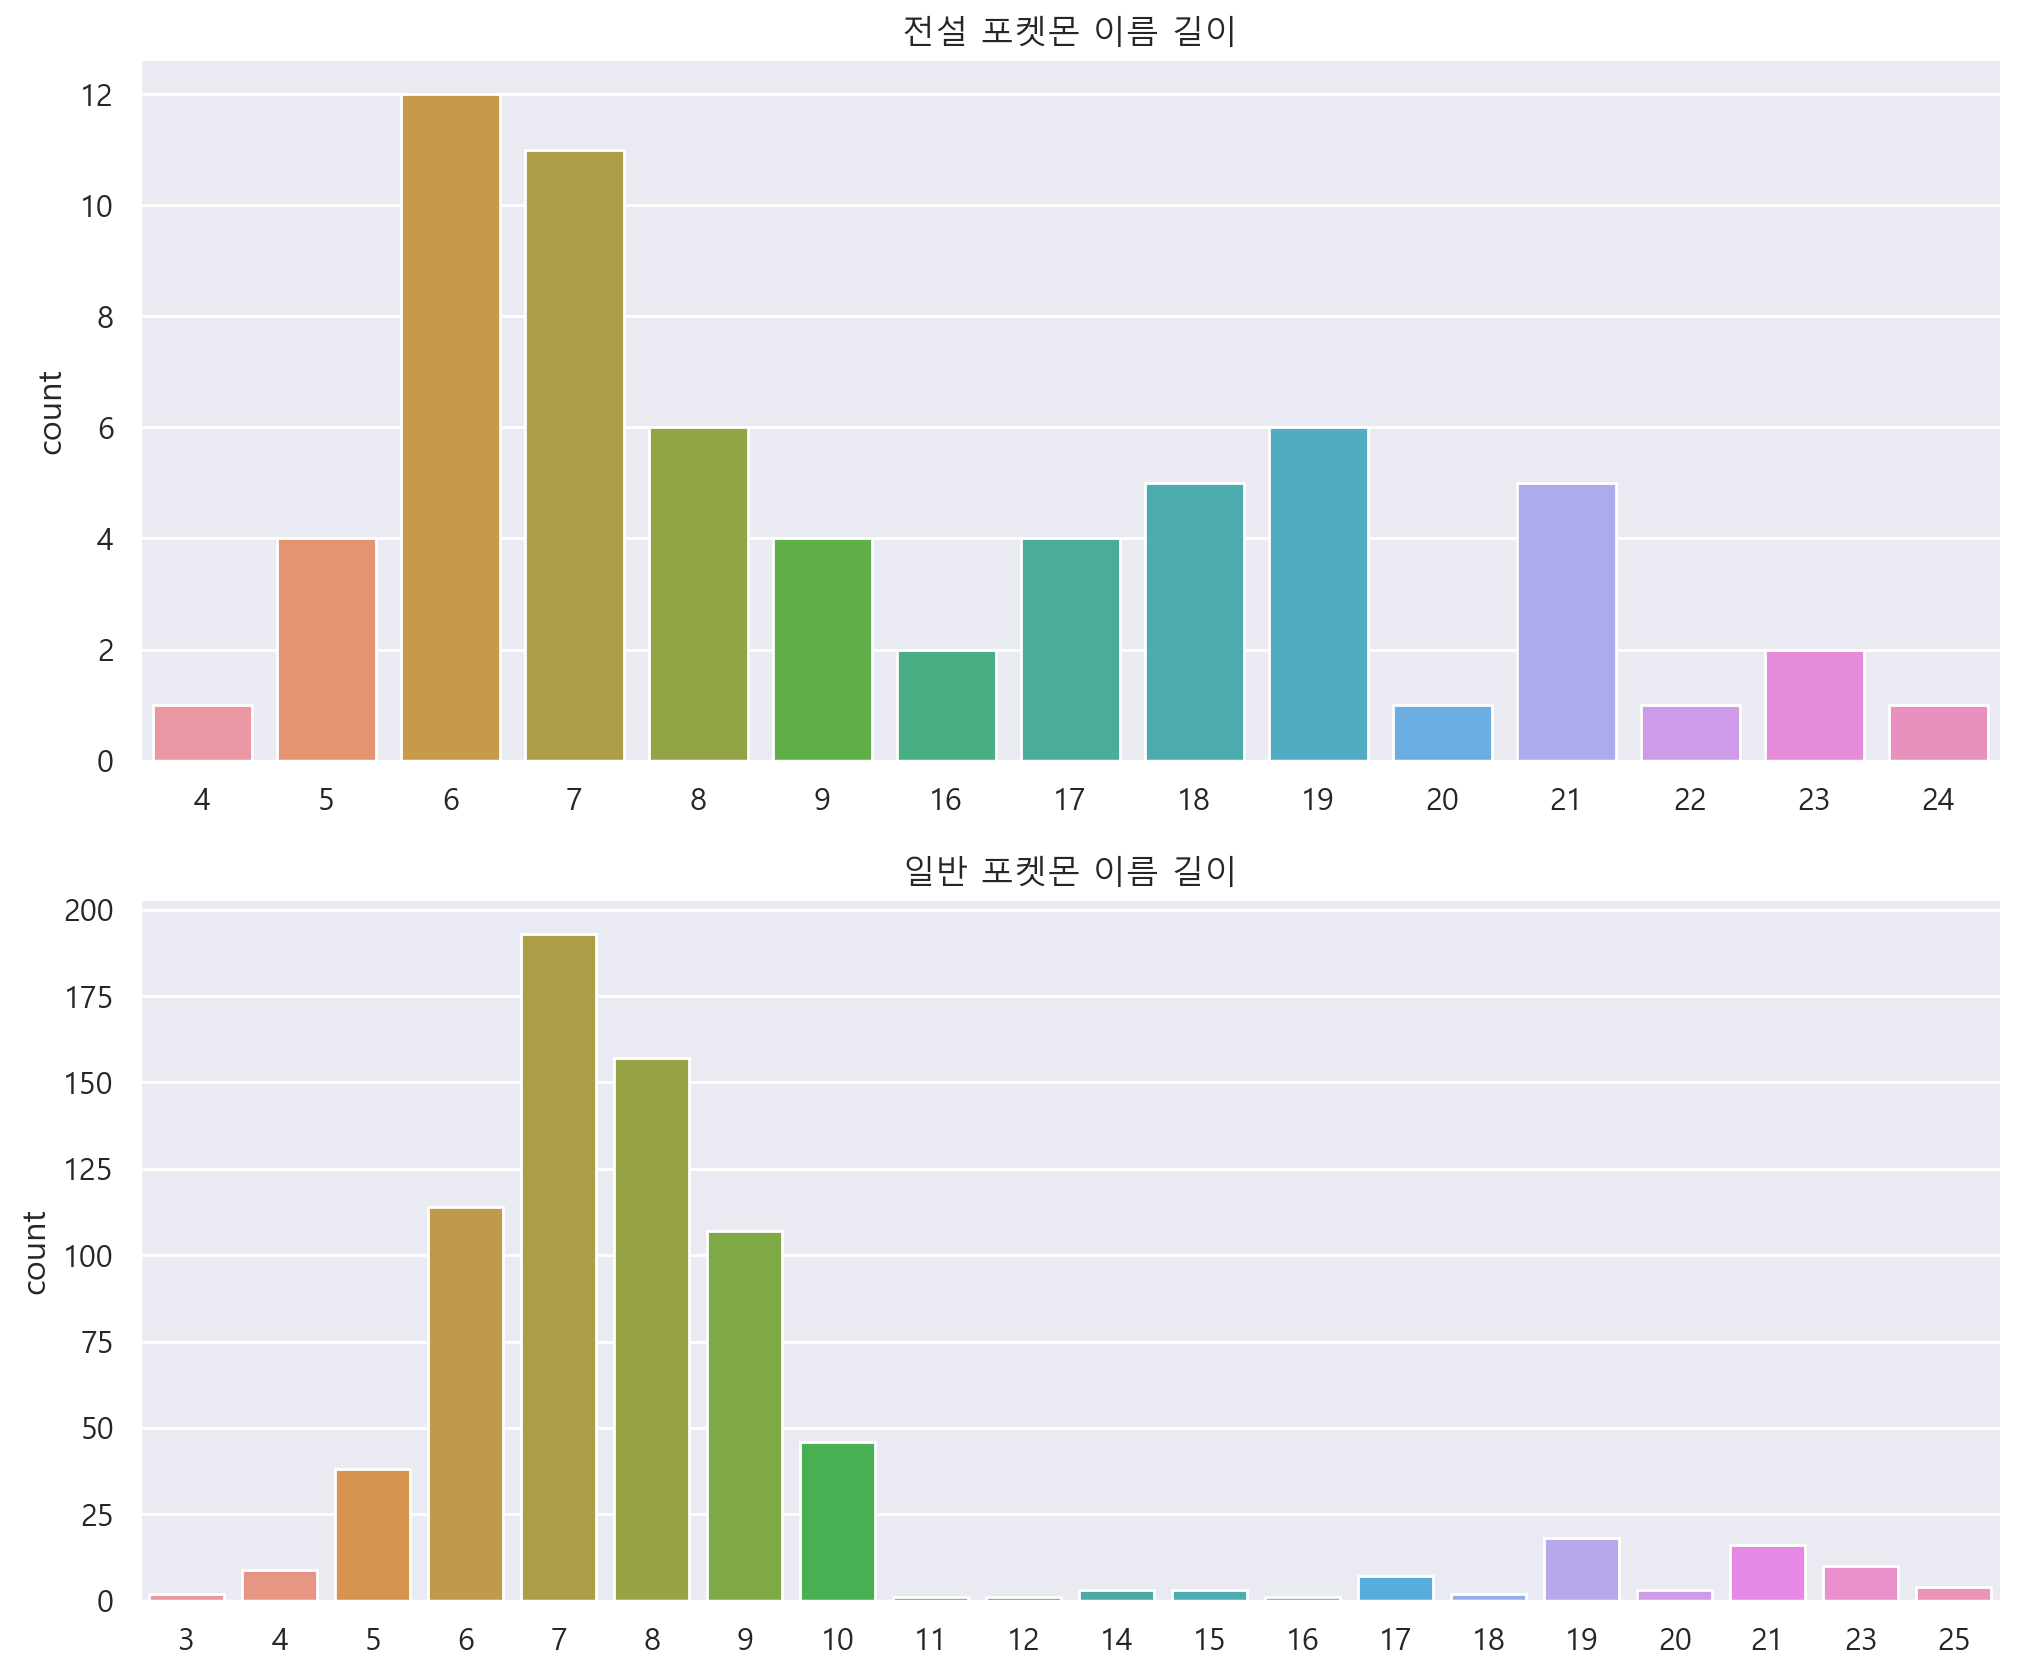

In [151]:
# 이름길이에 따른 전설,일반 포켓몬의 상관관계 시각화
plt.figure(figsize=(12, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("전설 포켓몬 이름 길이")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("일반 포켓몬 이름 길이")
plt.show()

In [152]:
# 전설 포켓몬 이름이 10글자 이상일 확률 구하기
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [153]:
# 일반 포켓몬 이름이 10글자 이상일 확률 구하기
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


사칙연산의 순서에따라 곱셈과 나눗셈은 왼쪽부터 계산하고 백분율로 표시하기위해 *100 을 해줌

In [154]:
# 포켓몬 전체 데이터에 이름 길이 칼럼 넣기
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  
0       65       65     45           1      False           9  
1       80       80     60           1      False           7  
2      100      100     80           1      False           8  
3      122      120     80           1      False          21  
4       60       50     65           1      False          10

In [155]:
# 이름의 길이가 10글자 이상이면 True, 아니면 False에 해당하는 칼럼을 생성하는 방법
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  
0       65       65     45           1      False           9      False  
1       80       80     60           1      False           7      False  
2      100      100     80           1      False           8      False  
3      122      120     80           1      False          21       True  
4       60       50     65           1      False          10       True

### 이름의 길이가 아닌 특징(토큰)으로 구별하는 칼럼 만들기

In [156]:
# for문을 원할하게 돌리기 위해 Name의 공백을 삭제하는 칼럼 생성
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

#                 Name   Type 1 Type 2  Total  HP  Attack  Defense  \
795  719              Diancie     Rock  Fairy    600  50     100      150   
796  719  DiancieMega Diancie     Rock  Fairy    700  50     160      110   
797  720  HoopaHoopa Confined  Psychic  Ghost    600  80     110       60   
798  720   HoopaHoopa Unbound  Psychic   Dark    680  80     160       60   
799  721            Volcanion     Fire  Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
795      100      150     50           6       True           7      False   
796      160      110    110           6       True          19       True   
797      150      130     70           6       True          19       True   
798      170      130     80           6       True          18       True   
799      130       90     70           6       True           9      False   

           Name_nospace  
795             Diancie  
796  DiancieMegaDiancie  
797  HoopaHoopaConfined  
798   HoopaHoopaUnbound  
799           Volcanion

In [157]:
# 이름이 알파벳으로만 구성되어 있는지에 대한 여부를 판별하는 칼럼 생성
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
0       65       65     45           1      False           9      False   
1       80       80     60           1      False           7      False   
2      100      100     80           1      False           8      False   
3      122      120     80           1      False          21       True   
4       60       50     65           1      False          10       True   

           Name_nospace  name_isalpha  
0             Bulbasaur          True  
1               Ivysaur          True  
2              Venusaur          True  
3  VenusaurMegaVenusaur          True  
4            Charmander          True

In [158]:
pokemon[pokemon["name_isalpha"] == False]

#              Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29          Nidoran♀   Poison     NaN    275   55      47       52   
37    32          Nidoran♂   Poison     NaN    273   46      57       40   
90    83        Farfetch'd   Normal  Flying    352   52      65       55   
131  122          Mr. Mime  Psychic   Fairy    460   40      45       65   
252  233          Porygon2   Normal     NaN    515   85      80       90   
270  250             Ho-oh     Fire  Flying    680  106     130       90   
487  439          Mime Jr.  Psychic   Fairy    310   20      25       45   
525  474         Porygon-Z   Normal     NaN    535   85      80       70   
794  718  Zygarde50% Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  name_isalpha  
34          Nidoran♀         False  
37          Nidoran♂         False  
90        Farfetch'd         False  
131          Mr.Mime         False  
252         Porygon2         False  
270            Ho-oh         False  
487          MimeJr.         False  
525        Porygon-Z         False  
794  Zygarde50%Forme         False

확인해보니 합리적으로 이름을 수정할 수 있을거같음

In [159]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

#           Name   Type 1  Type 2  Total   HP  Attack  Defense  \
34    29      Nidoran X   Poison     NaN    275   55      47       52   
37    32      Nidoran Y   Poison     NaN    273   46      57       40   
90    83      Farfetchd   Normal  Flying    352   52      65       55   
131  122        Mr Mime  Psychic   Fairy    460   40      45       65   
252  233    Porygon Two   Normal     NaN    515   85      80       90   
270  250          Ho Oh     Fire  Flying    680  106     130       90   
487  439        Mime Jr  Psychic   Fairy    310   20      25       45   
525  474      Porygon Z   Normal     NaN    535   85      80       70   
794  718  Zygarde Forme   Dragon  Ground    600  108     100      121   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  name_count  long_name  \
34        40       40     41           1      False           8      False   
37        40       40     50           1      False           8      False   
90        58       62     60           1      False          10       True   
131      100      120     90           1      False           8      False   
252      105       95     60           2      False           8      False   
270      110      154     90           2       True           5      False   
487       70       90     60           4      False           8      False   
525      135       75     90           4      False           9      False   
794       81       95     95           6       True          16       True   

        Name_nospace  name_isalpha  
34         Nidoran X         False  
37         Nidoran Y         False  
90         Farfetchd         False  
131          Mr.Mime         False  
252      Porygon Two         False  
270            Ho Oh         False  
487          MimeJr.         False  
525        Porygon Z         False  
794  Zygarde50%Forme         False

In [160]:
# 임의로 만든 칼럼내용 다시 수정
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())

### 정규표현식

In [161]:
import re

In [162]:
name = "CharizardMega Charizard X"

In [163]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [164]:
# 0번째 인덱스에 해당하는 "CharizardMega"에서 대문자를 구분해서 떨어트리고 싶음
# 대문자로 시작해서 소문자로 끝나는 토큰
temp = name_split[0]
temp

'CharizardMega'

In [165]:
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

- [A-Z]는 알파벳 대문자 : [A-Z]로 시작하는 글자
- [a-z]는 알파벳 소문자 : [a-z]로 시작하는 글자
- *은 바로앞에 해당하는 조건에 맞는 글자반복 가능

In [166]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [167]:
# 위으 for문을 함수화
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)

    return np.array(list(set(tokens)))

In [168]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'X', 'Mega'], dtype='<U9')

In [169]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

In [170]:
token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'X', 'Mega', 'Y', 'Mewtwo', 'Mega', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Rayquaza', 'Rayquaza', 'Mega', 'Jirachi', 'Forme', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Defense', 'Forme', 'Deoxys', 'Forme', 'Deoxys', 'Speed', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Altered', 'Forme', 'Giratina', 'Forme', 'Giratina', 'Origin', 'Darkrai', 'Shaymin', 'Forme', 'Land', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Incarnate', 'Tornadus', 'Forme', 'Tornadus', 'Forme', 'Therian', 'Incarnate', 'Forme', 'Thundurus', 'Forme', 'Therian', 'Thundurus', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Forme', 'Therian', 'Kyurem', 'Black', 'Kyurem', 'White', 'Kyurem', 'Xerneas', 'Yveltal',

### collection의 Counter 사용해보기

In [171]:
from collections import Counter
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [172]:
# a 라는 변수 안에서 가장 많이 사용된 순서대로 횟수랑같이 뽑아보기
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [173]:
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Deoxys', 4),
 ('Mewtwo', 3),
 ('Incarnate', 3),
 ('Therian', 3),
 ('Kyurem', 3),
 ('Latias', 2),
 ('Latios', 2),
 ('Kyogre', 2)]

In [174]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

In [175]:
pokemon.head(10)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass  Poison    318  45      49       49   
1  2                    Ivysaur  Grass  Poison    405  60      62       63   
2  3                   Venusaur  Grass  Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9  7                   Squirtle  Water     NaN    314  44      48       65   

   Sp. Atk  Sp. Def  ...  Forme   Mega  Deoxys  Mewtwo  Incarnate Therian  \
0       65       65  ...  False  False   False   False      False   False   
1       80       80  ...  False  False   False   False      False   False   
2      100      100  ...  False  False   False   False      False   False   
3      122      120  ...  False   True   False   False      False   False   
4       60       50  ...  False  False   False   False      False   False   
5       80       65  ...  False  False   False   False      False   False   
6      109       85  ...  False  False   False   False      False   False   
7      130       85  ...  False   True   False   False      False   False   
8      159      115  ...  False   True   False   False      False   False   
9       50       64  ...  False  False   False   False      False   False   

   Kyurem  Latias  Latios  Kyogre  
0   False   False   False   False  
1   False   False   False   False  
2   False   False   False   False  
3   False   False   False   False  
4   False   False   False   False  
5   False   False   False   False  
6   False   False   False   False  
7   False   False   False   False  
8   False   False   False   False  
9   False   False   False   False  

[10 rows x 27 columns]

### 범주형 원-핫 인코딩

In [176]:
print(types)

['Steel', 'Water', 'Fairy', 'Fighting', 'Electric', 'Ground', 'Poison', 'Rock', 'Bug', 'Fire', 'Psychic', 'Ice', 'Flying', 'Ghost', 'Grass', 'Normal', 'Dragon', 'Dark']


In [177]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

Type 1  Type 2  Steel  Water  Fairy  Fighting  Electric  Ground  Poison  \
0  Grass  Poison  False  False  False     False     False   False    True   
1  Grass  Poison  False  False  False     False     False   False    True   
2  Grass  Poison  False  False  False     False     False   False    True   
3  Grass  Poison  False  False  False     False     False   False    True   
4   Fire     NaN  False  False  False     False     False   False   False   

    Rock    Bug   Fire  Psychic    Ice  Flying  Ghost  Grass  Normal  Dragon  \
0  False  False  False    False  False   False  False   True   False   False   
1  False  False  False    False  False   False  False   True   False   False   
2  False  False  False    False  False   False  False   True   False   False   
3  False  False  False    False  False   False  False   True   False   False   
4  False  False   True    False  False   False  False  False   False   False   

    Dark  
0  False  
1  False  
2  False  
3  False  
4  False

In [178]:
pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  ...    Bug   Fire  Psychic    Ice  Flying  Ghost  Grass  \
0       65       65  ...  False  False    False  False   False  False   True   
1       80       80  ...  False  False    False  False   False  False   True   
2      100      100  ...  False  False    False  False   False  False   True   
3      122      120  ...  False  False    False  False   False  False   True   
4       60       50  ...  False   True    False  False   False  False  False   

   Normal  Dragon   Dark  
0   False   False  False  
1   False   False  False  
2   False   False  False  
3   False   False  False  
4   False   False  False  

[5 rows x 45 columns]

In [180]:
pokemon.to_csv("pokemon_set.csv")